<a href="https://colab.research.google.com/github/AanchalA/PyTorch-Deep-Learning-Bootcamp/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

## Dataset

In [ ]:
n_samples = 1000

X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
len(X), len(y)

(1000, 1000)

In [ ]:
X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]),
 array([1, 1, 1, 1, 0]))

In [ ]:
data = pd.DataFrame({"X1": X[:, 0],
              "X2": X[:, 1],
              "Y": y})
data.head()

,X1,X2,Y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


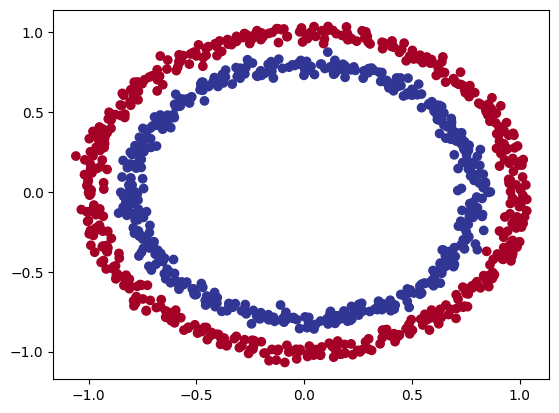

In [ ]:
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### Check Input and Output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

### Turn data to tensors and do train/test split

In [ ]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [ ]:
type(y), y.dtype

(numpy.ndarray, dtype('int64'))

In [ ]:
X = torch.from_numpy(X).type(torch.float)
print(type(X))
print(X.dtype)
print(X.shape)
X[:2]

<class 'torch.Tensor'>
torch.float32
torch.Size([1000, 2])


tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533]])

In [ ]:
y = torch.from_numpy(y).type(torch.float)
print(type(y))
print(y.dtype)
print(y.shape)
y[:2]

<class 'torch.Tensor'>
torch.float32
torch.Size([1000])


tensor([1., 1.])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X_train), len(y_train), len(X_test), len(y_test)

(800, 800, 200, 200)

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
X_test[:5], y_test[:5]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438]]),
 tensor([1., 0., 1., 0., 1.]))

## Building the Model

### Setting up the device

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

### Model Version 0

In [ ]:
class CircleModelV0(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)
        # self.two_linear_layers = nn.Sequential(self.layer_1, self.layer_2).to(DEVICE)

    def forward(self, x):
        return self.layer_2(self.layer_1(x))
        # return self.two_linear_layers(x)

In [ ]:
model_v0 = CircleModelV0()
model_v0.to(DEVICE)
model_v0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_v0.parameters()).device

device(type='cpu')

### Model Version 1

In [ ]:
model_v1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(DEVICE)

model_v1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.two_linear_layers = nn.Sequential(
                                    nn.Linear(in_features=2, out_features=10),
                                    nn.Linear(in_features=10, out_features=1)
                                    ).to(DEVICE)

    def forward(self, x):
        return self.two_linear_layers(x)

In [ ]:
model_v1 = CircleModelV1()
model_v1

CircleModelV1(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=1, bias=True)
  )
)

In [ ]:
model_v1.state_dict()

OrderedDict([('two_linear_layers.0.weight',
              tensor([[ 0.1693, -0.6241],
                      [ 0.1681, -0.1120],
                      [-0.1152,  0.5313],
                      [ 0.6135, -0.3438],
                      [-0.6488,  0.0878],
                      [ 0.2243,  0.2123],
                      [ 0.2659, -0.4284],
                      [ 0.6850,  0.2056],
                      [-0.0903, -0.5238],
                      [-0.4565,  0.2202]])),
             ('two_linear_layers.0.bias',
              tensor([-0.5403,  0.4897,  0.6228, -0.3285,  0.2837,  0.1269,  0.3866, -0.5478,
                       0.0071,  0.2103])),
             ('two_linear_layers.1.weight',
              tensor([[-0.2729,  0.0669, -0.2864,  0.1163,  0.0100, -0.2453,  0.0510,  0.3046,
                       -0.0217, -0.3046]])),
             ('two_linear_layers.1.bias', tensor([0.1973]))])

In [ ]:
print(len(list(model_v1.parameters())))          ## Returns the number of total parameter tensors
# ## To get the actual number of individual parameter count
total_parameters = sum(p.numel() for p in model_v1.parameters())     ## numel returns the number of elements in the tensor. Do not use len(p) here instead len(p) returns p.shape[0], not the actual total num of parameters in the tensor.
total_parameters

4


41

In [ ]:
with torch.inference_mode():
    untrained_preds = model_v1(X_test)
print(len(untrained_preds))
print(untrained_preds.shape)
print(len(y_test))
print(y_test.shape)
y_test[:10], torch.abs(torch.round(untrained_preds[:10]))

200
torch.Size([200, 1])
200
torch.Size([200])


(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]))

### Loss Function and Optimizer Setup

In [ ]:
loss_fn = nn.BCELoss()                ## BCELoss requires the inputs to have gone through the sigmoid activation, before loss calculation.
loss_fn = nn.BCEWithLogitsLoss()      ## This loss combines a Sigmoid layer and the BCELoss in one single class.
loss_fn

BCEWithLogitsLoss()

In [ ]:
sgd_optimizer = torch.optim.SGD(params=model_v1.parameters(),
                            lr=0.1)
sgd_optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

### Setting up the Evaluation Metric

In [ ]:
def accuracy_fn(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item()
    accuracy = (correct / len(y_preds)) * 100
    return accuracy

### From Logits to Labels

In [ ]:
model_v1.eval()
with torch.inference_mode():
    logits = model_v1(X_test)              ## Logits are the "raw outputs" from the model
logits[:5]

tensor([[-0.2831],
        [-0.1646],
        [-0.3094],
        [-0.2768],
        [ 0.1417]])

In [ ]:
# With the Sigmoid Activation function, we turn logits into prediction probabilities (in range 0 - 1)
pred_probs = torch.sigmoid(logits)
pred_probs[:5]

tensor([[0.4297],
        [0.4589],
        [0.4233],
        [0.4312],
        [0.5354]])

In [ ]:
# No we use the round function on these probabilities such that y = 1 if pred_prob >= 0.5 else 0
pred_labels = torch.round(pred_probs)
pred_labels[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])

In [ ]:
## Putting it all together
model_v1.eval()
with torch.inference_mode():
    pred_labels = torch.round(torch.sigmoid(model_v1(X_test.to(DEVICE))))
pred_labels[:5]

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]])

### Training the Model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 101

In [ ]:
# Putting all the data on the target device
X_train, X_test, y_train, y_test = X_train.to(DEVICE), X_test.to(DEVICE), y_train.to(DEVICE), y_test.to(DEVICE)

In [ ]:
for epoch in range(epochs):

    # ---------- TRAINING ----------
    model_v1.train()
    train_logits = model_v1(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn(train_logits, y_train)        ## BCEWithLogitsLoss expects Logits as input
    train_acc = accuracy_fn(y_train, train_preds)

    sgd_optimizer.zero_grad()
    train_loss.backward()
    sgd_optimizer.step()

    # ---------- EVALUATION ----------
    model_v1.eval()
    with torch.inference_mode():
        test_logits = model_v1(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_test, test_preds)

    if epoch % 10 == 0:
        print(f"EPOCH: {epoch} | Train Loss: {train_loss: .5f}, Train Accuracy: {train_acc: .2f}% | Test Loss: {test_loss: .5f}, Test Accuracy: {test_acc: .2f}%")

EPOCH: 0 | Train Loss:  0.70114, Train Accuracy:  49.75% | Test Loss:  0.70234, Test Accuracy:  47.50%
EPOCH: 10 | Train Loss:  0.69728, Train Accuracy:  49.50% | Test Loss:  0.69915, Test Accuracy:  50.50%
EPOCH: 20 | Train Loss:  0.69565, Train Accuracy:  49.75% | Test Loss:  0.69778, Test Accuracy:  51.50%
EPOCH: 30 | Train Loss:  0.69474, Train Accuracy:  50.62% | Test Loss:  0.69699, Test Accuracy:  51.50%
EPOCH: 40 | Train Loss:  0.69416, Train Accuracy:  50.88% | Test Loss:  0.69645, Test Accuracy:  49.50%
EPOCH: 50 | Train Loss:  0.69378, Train Accuracy:  50.75% | Test Loss:  0.69608, Test Accuracy:  49.00%
EPOCH: 60 | Train Loss:  0.69353, Train Accuracy:  51.00% | Test Loss:  0.69580, Test Accuracy:  48.50%
EPOCH: 70 | Train Loss:  0.69335, Train Accuracy:  51.88% | Test Loss:  0.69559, Test Accuracy:  48.00%
EPOCH: 80 | Train Loss:  0.69324, Train Accuracy:  51.38% | Test Loss:  0.69544, Test Accuracy:  48.00%
EPOCH: 90 | Train Loss:  0.69315, Train Accuracy:  50.75% | Test 

### Make predictions and evaluate the model through visualization

From the above loss and accuracy values it looks like the model is not learning anything.

- `plot_decision_boundary()` helper function along with other helper functions at - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py

In [ ]:
import requests
from pathlib import Path

In [ ]:
# Download the helper functions file from the URL if not already downloaded

helper_functions_path = "helper_functions.py"
RAW_URL = "https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py"

if Path(helper_functions_path).is_file():
    print(f"{helper_functions_path} file already exists, skipping download.")
else:
    print(f"Downloading helper_functions.py from {RAW_URL}")
    response = requests.get(RAW_URL)
    with open(helper_functions_path, "wb") as f:
        f.write(response.content)

In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

In [ ]:
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

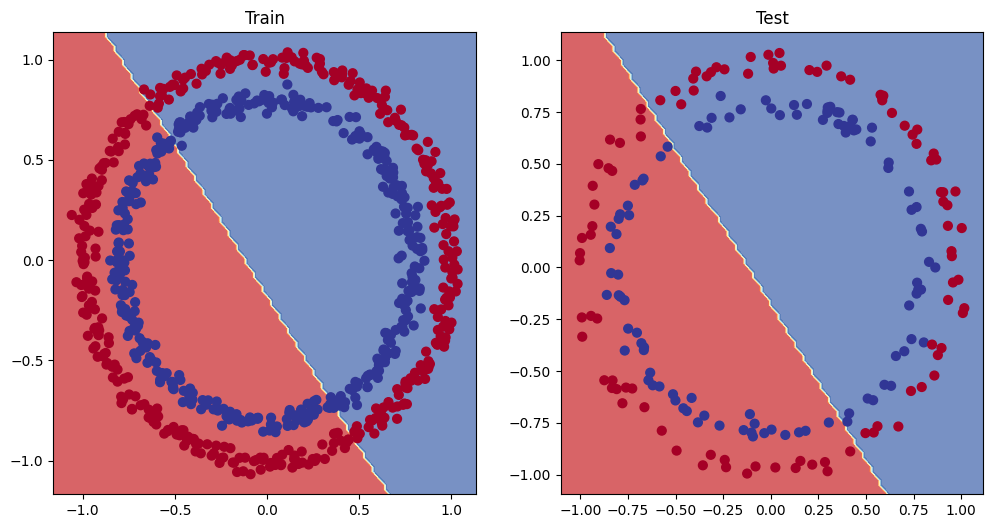

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_v1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_v1, X_test, y_test)

### Model Version 2 (Improving on V1)

List of possible improvements:
- Add more hidden layers to the model
- Increase the number of neurons in the hidden layers
- Add some non-linearity inside the model (some activation functions between the linear layers)
- Train the model for longer (increase num epochs)
- Adjust the learning rate
- Try out a different optimization function (like Adam)
- Try out different activtion functions (Relu, TanH)
- Try out different loss functions

In [ ]:
class CircleModelV2(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.linear_layer_1 = nn.Linear(in_features=2, out_features=10)
        self.linear_layer_2 = nn.Linear(in_features=10, out_features=10)
        self.linear_layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    # def forward(self, x):
    #     z = self.linear_layer_1(x)
    #     z = self.relu(z)
    #     z = self.linear_layer_2(z)
    #     z = self.relu(z)
    #     z = self.linear_layer_3(x)
    #     return z

    def forward(self, x):
        return self.linear_layer_3(self.relu(self.linear_layer_2(self.relu(self.linear_layer_1(x)))))

In [ ]:
model_v2 = CircleModelV2().to(DEVICE)
model_v2

CircleModelV2(
  (linear_layer_1): Linear(in_features=2, out_features=10, bias=True)
  (linear_layer_2): Linear(in_features=10, out_features=10, bias=True)
  (linear_layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
print(len(list(model_v2.parameters())))
total_parameters = sum(p.numel() for p in model_v2.parameters())
print(f"Total number of parameters: {total_parameters}")

6
Total number of parameters: 151


In [ ]:
loss_fn = nn.BCEWithLogitsLoss()
loss_fn

BCEWithLogitsLoss()

In [ ]:
optimizer = torch.optim.SGD(params=model_v2.parameters(),
                            lr=0.3)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.3
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001

In [ ]:
# Putting all the data on the target device
X_train, X_test, y_train, y_test = X_train.to(DEVICE), X_test.to(DEVICE), y_train.to(DEVICE), y_test.to(DEVICE)

In [ ]:
for epoch in range(epochs):
    model_v2.train()
    train_logits = model_v2(X_train).squeeze()
    train_preds = torch.round(torch.sigmoid(train_logits))

    train_loss = loss_fn(train_logits, y_train)
    train_acc = accuracy_fn(y_true=y_train, y_preds=train_preds)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    model_v2.eval()
    with torch.inference_mode():
        test_logits = model_v2(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_preds=test_preds)

    if epoch % 100 == 0:
        print(f"EPOCH: {epoch} | Train Loss: {train_loss: .5f}, Train Accuracy: {train_acc: .2f}% | Test Loss: {test_loss: .5f}, Test Accuracy: {test_acc: .2f}%")


EPOCH: 0 | Train Loss:  0.69295, Train Accuracy:  50.00% | Test Loss:  0.69306, Test Accuracy:  50.00%
EPOCH: 100 | Train Loss:  0.68796, Train Accuracy:  53.00% | Test Loss:  0.68720, Test Accuracy:  56.00%
EPOCH: 200 | Train Loss:  0.67525, Train Accuracy:  54.37% | Test Loss:  0.67280, Test Accuracy:  56.50%
EPOCH: 300 | Train Loss:  0.62461, Train Accuracy:  73.75% | Test Loss:  0.62162, Test Accuracy:  78.50%
EPOCH: 400 | Train Loss:  0.37448, Train Accuracy:  97.38% | Test Loss:  0.40781, Test Accuracy:  92.50%
EPOCH: 500 | Train Loss:  0.36910, Train Accuracy:  76.75% | Test Loss:  0.45300, Test Accuracy:  73.50%
EPOCH: 600 | Train Loss:  0.08191, Train Accuracy:  100.00% | Test Loss:  0.11981, Test Accuracy:  97.50%
EPOCH: 700 | Train Loss:  0.04117, Train Accuracy:  100.00% | Test Loss:  0.06974, Test Accuracy:  99.00%
EPOCH: 800 | Train Loss:  0.02686, Train Accuracy:  100.00% | Test Loss:  0.04934, Test Accuracy:  99.00%
EPOCH: 900 | Train Loss:  0.01987, Train Accuracy:  10

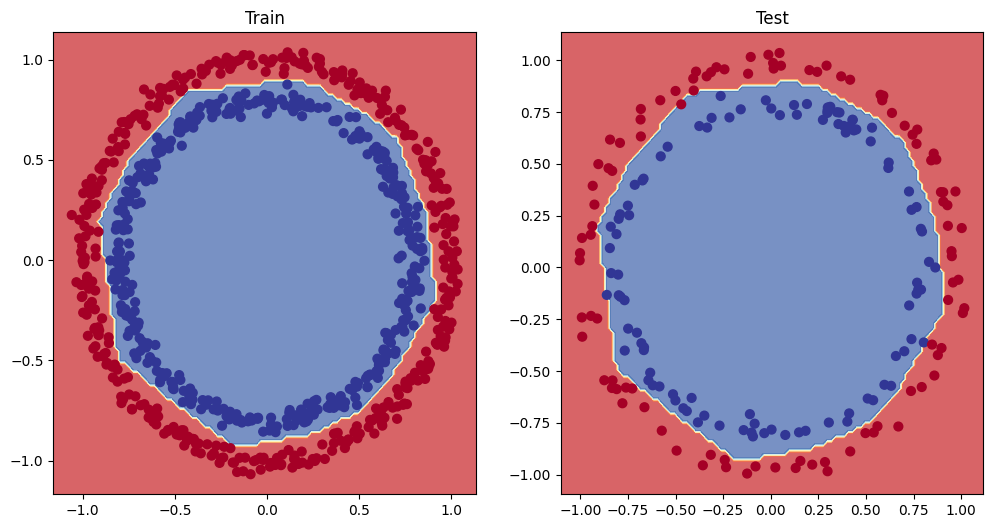

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_v2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_v2, X_test, y_test)

# Multi-Class Classification

## Dataset

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [ ]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

In [ ]:
X_blob, y_blob = make_blobs(n_samples=1000,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,                 ## Adding some noise in the dataset.
                            n_features=NUM_FEATURES,
                            random_state=RANDOM_SEED)

In [ ]:
# Turning the data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

In [ ]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

len(X_blob_train), len(y_blob_train), len(X_blob_test), len(y_blob_test)

(800, 800, 200, 200)

In [ ]:
X_blob_train

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        ...,
        [-1.7366,  9.7850],
        [-6.8139, -7.1006],
        [-9.0311,  4.5007]])

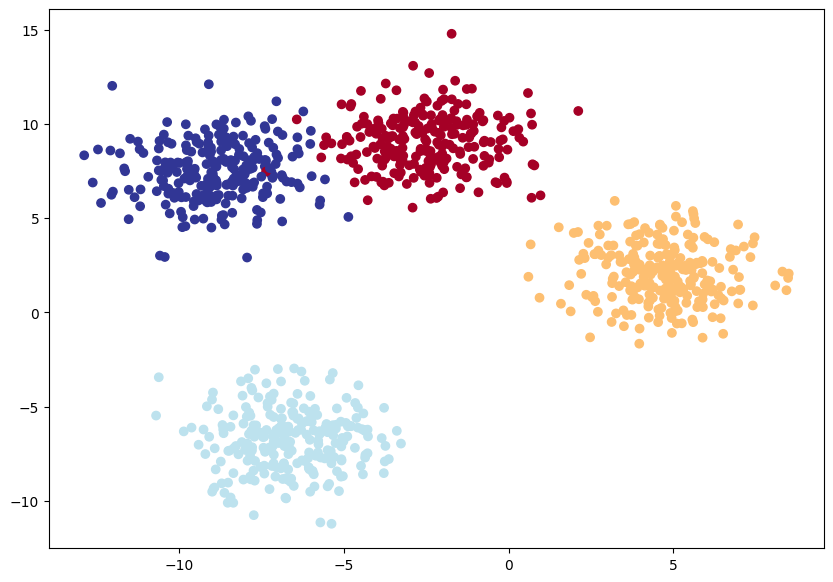

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [ ]:
# Putting all the data on the target device
X_train, X_test, y_train, y_test = X_train.to(DEVICE), X_test.to(DEVICE), y_train.to(DEVICE), y_test.to(DEVICE)

## Setting up the device

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
DEVICE

'cpu'

## Building the Model

In [ ]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """ Initialized the multi-class classification model

        Args:
            input_features (int): Number of input features to the model.
            output_features (int): Number of output features.
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer_stack(x)

In [ ]:
blob_model = BlobModel(input_features=NUM_FEATURES, output_features=NUM_CLASSES).to(DEVICE)
blob_model

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
print(sum(p.numel() for p in blob_model.parameters()))

132


## Setting up the loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
loss_fn

CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(params=blob_model.parameters(),
                            lr=0.1)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.1
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

## Raw Logits to Labels

In [ ]:
# Inference
blob_model.eval()
with torch.inference_mode():
    pred_logits = blob_model(X_test)
pred_logits[:5]

tensor([[ 0.2012, -0.3399,  0.0384, -0.0197],
        [ 0.1854, -0.3857, -0.0116, -0.0469],
        [ 0.2536, -0.2390,  0.1556,  0.0181],
        [ 0.1860, -0.3692,  0.0045, -0.0307],
        [ 0.2444, -0.2795,  0.1278, -0.0108]])

In [ ]:
pred_logits.shape, pred_logits.ndim

(torch.Size([200, 4]), 2)

In [ ]:
# Converting raw logits into prediction probabilities using the softmax function
pred_probs = torch.softmax(pred_logits, dim=1)
pred_probs[:5]

tensor([[0.3092, 0.1800, 0.2628, 0.2480],
        [0.3146, 0.1777, 0.2583, 0.2494],
        [0.3023, 0.1847, 0.2741, 0.2389],
        [0.3112, 0.1786, 0.2596, 0.2506],
        [0.3070, 0.1818, 0.2733, 0.2379]])

In [ ]:
pred_probs.shape, pred_probs.ndim

(torch.Size([200, 4]), 2)

In [ ]:
# Converting the prodiction probabilities into labels, index=label
labels = torch.argmax(pred_probs, dim=1)
labels[:5]

tensor([0, 0, 0, 0, 0])

In [ ]:
y_blob[:5]

tensor([3., 2., 2., 1., 1.])

In [ ]:
# Putting it all together
labels = torch.argmax(torch.softmax(pred_logits, dim=1), dim=1)
labels[:5]

tensor([0, 0, 0, 0, 0])

## Building the training loop

In [ ]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 100

In [ ]:
for epoch in range(epochs):
    blob_model.train()
    blob_train_logits = blob_model(X_blob_train)
    blob_train_preds = torch.softmax(blob_train_logits, dim=1).argmax(dim=1)

    blob_train_loss = loss_fn(blob_train_logits, y_blob_train.type(torch.LongTensor))
    blob_train_acc = accuracy_fn(y_true=y_blob_train, y_preds=blob_train_preds)

    optimizer.zero_grad()
    blob_train_loss.backward()
    optimizer.step()

    blob_model.eval()
    with torch.inference_mode():
        blob_test_logits = blob_model(X_blob_test)
    blob_test_preds = torch.softmax(blob_test_logits, dim=1).argmax(dim=1)

    blob_test_loss = loss_fn(blob_test_logits, y_blob_test.type(torch.LongTensor))
    blob_test_acc = accuracy_fn(y_true=y_blob_test, y_preds=blob_test_preds)

    if epoch % 10 == 0:
        print(f"EPOCH: {epoch} | Train Loss: {blob_train_loss: .5f}, Train Accuracy: {blob_train_acc: .2f}% | Test Loss: {blob_test_loss: .5f}, Test Accuracy: {blob_test_acc: .2f}%")


EPOCH: 0 | Train Loss:  1.06362, Train Accuracy:  54.62% | Test Loss:  1.00386, Test Accuracy:  55.00%
EPOCH: 10 | Train Loss:  0.62096, Train Accuracy:  97.25% | Test Loss:  0.63668, Test Accuracy:  98.00%
EPOCH: 20 | Train Loss:  0.40612, Train Accuracy:  98.75% | Test Loss:  0.41038, Test Accuracy:  100.00%
EPOCH: 30 | Train Loss:  0.23616, Train Accuracy:  99.12% | Test Loss:  0.22684, Test Accuracy:  99.50%
EPOCH: 40 | Train Loss:  0.10442, Train Accuracy:  99.25% | Test Loss:  0.09487, Test Accuracy:  99.50%
EPOCH: 50 | Train Loss:  0.06402, Train Accuracy:  99.25% | Test Loss:  0.05627, Test Accuracy:  99.50%
EPOCH: 60 | Train Loss:  0.04968, Train Accuracy:  99.25% | Test Loss:  0.04191, Test Accuracy:  99.50%
EPOCH: 70 | Train Loss:  0.04243, Train Accuracy:  99.25% | Test Loss:  0.03429, Test Accuracy:  99.50%
EPOCH: 80 | Train Loss:  0.03799, Train Accuracy:  99.25% | Test Loss:  0.02949, Test Accuracy:  99.50%
EPOCH: 90 | Train Loss:  0.03501, Train Accuracy:  99.25% | Test

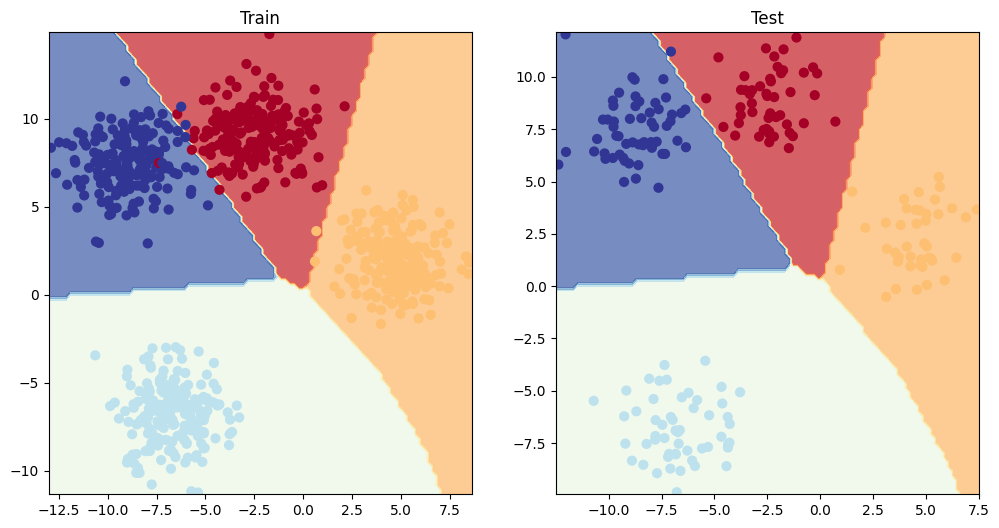

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(blob_model, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(blob_model, X_blob_test, y_blob_test)